In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

sns.set()

In [2]:
df =  pd.read_excel('../1_Data/datasets/2022_smd_hourly.xlsx' ,sheet_name='ISO NE CA')
df['Date'] = df.Date + pd.to_timedelta(df.Hr_End, unit='h')
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

In [3]:
df

,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point,System_Load,Reg_Service_Price,Reg_Capacity_Price,Min_5min_RSP,Max_5min_RSP,Min_5min_RCP,Max_5min_RCP
Date,,,,,,,,,,,,,,,,,,,,
2022-01-01 01:00:00,1,10845.4,10789.727,32.22,32.35,-0.12,-0.01,25.90,25.95,0.0,-0.05,44,43,10983,0.237500,11.284167,0.05,0.30,9.99,20.12
2022-01-01 02:00:00,2,10593.7,10320.195,32.12,32.31,-0.14,-0.05,25.87,25.87,0.0,0.00,44,43,10510,0.300000,11.383333,0.30,0.30,10.54,11.46
2022-01-01 03:00:00,3,10207.3,9972.371,30.76,30.85,0.00,-0.09,27.51,27.50,0.0,0.01,44,43,10161,0.112500,12.375000,0.05,0.30,11.46,12.68
2022-01-01 04:00:00,4,10026.4,9779.883,29.60,29.69,0.00,-0.09,25.14,25.13,0.0,0.01,44,43,9970,0.258333,11.763333,0.05,0.30,11.58,12.68
2022-01-01 05:00:00,5,10283.0,9777.168,30.78,30.86,0.00,-0.08,29.28,29.27,0.0,0.01,44,43,9973,0.112500,12.405000,0.05,0.30,11.58,12.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,20,12910.4,13191.898,39.01,38.97,0.00,0.04,26.36,26.27,0.0,0.09,51,50,13489,0.335000,109.751667,0.01,0.40,9.52,123.90
2022-12-31 21:00:00,21,11992.9,12575.713,38.88,38.88,0.00,0.00,25.38,25.31,0.0,0.07,51,50,12868,0.075000,21.605833,0.01,0.40,12.71,118.36
2022-12-31 22:00:00,22,11444.8,11983.841,38.68,38.73,0.00,-0.05,31.80,31.69,0.0,0.11,50,49,12264,0.230000,10.656667,0.01,0.25,10.46,12.82


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features_considered = ['Hr_End', 'DA_Demand', 'DA_LMP', 'DA_EC', 'DA_CC', 'DA_MLC', 'Dry_Bulb', 'Dew_Point']
target_variable = 'System_Load'

# generate lagged features for past 24 hours
for feature in features_considered:
    for lag in range(1, 25):
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

df.dropna(inplace=True)

# scale
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df[features_considered + [f"{feat}_lag_{lag}" for feat in features_considered for lag in range(1, 25)]])
scaled_target = scaler.fit_transform(df[[target_variable]])

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state=42)

/tmp/ipykernel_12086/2297386871.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
/tmp/ipykernel_12086/2297386871.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
/tmp/ipykernel_12086/2297386871.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

# Build the MLP Model

In [5]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

2024-04-28 18:14:36.761612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 18:14:36.808572: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

2024-04-28 18:14:37.669218: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
history = model.fit(
    X_train, y_train,
    epochs=100,  # Maximum number of epochs to train for
    batch_size=32,  # Number of samples per gradient update
    validation_split=0.1,  # Fraction of the training data to be used as validation data
    callbacks=[early_stopping_monitor],  # List of callbacks to apply during training
    verbose=1  # Show progress bar
)

Epoch 1/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0138 - mae: 0.0741 - val_loss: 0.0026 - val_mae: 0.0404
Epoch 2/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0022 - mae: 0.0362 - val_loss: 0.0019 - val_mae: 0.0343
Epoch 3/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0017 - mae: 0.0323 - val_loss: 0.0017 - val_mae: 0.0325
Epoch 4/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0013 - mae: 0.0287 - val_loss: 0.0013 - val_mae: 0.0284
Epoch 5/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0013 - mae: 0.0282 - val_loss: 0.0011 - val_mae: 0.0255
Epoch 6/100
197/197 [==============================] - 0s 992us/step - loss: 0.0013 - mae: 0.0279 - val_loss: 0.0010 - val_mae: 0.0251
Epoch 7/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0272 - val_loss: 9.8048e-04 - val_mae: 0.0243
Epoch 8/100
197/197 [==============================] - 0s 982us

# 24 Hours ahead

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_24_hours = X_test[-24:]  
y_24_hours_actual = y_test[-24:]  

# Predict the demand for these 24 hours
predicted_24_hours = model.predict(X_24_hours)
predicted_24_hours = scaler.inverse_transform(predicted_24_hours)  
actual_24_hours = scaler.inverse_transform(y_24_hours_actual)  

# Calculate error metrics specifically for these 24 hours
mae_24 = mean_absolute_error(actual_24_hours, predicted_24_hours)
mse_24 = mean_squared_error(actual_24_hours, predicted_24_hours)
rmse_24 = np.sqrt(mse_24)
r2_24 = r2_score(actual_24_hours, predicted_24_hours)

print(f"24-Hour Specific - MAE: {mae_24}, MSE: {mse_24}, RMSE: {rmse_24}, R-squared: {r2_24}")

1/1 [==============================] - 0s 43ms/step
24-Hour Specific - MAE: 482.3990885416667, MSE: 443728.4620409012, RMSE: 666.1294634235159, R-squared: 0.949571801236264


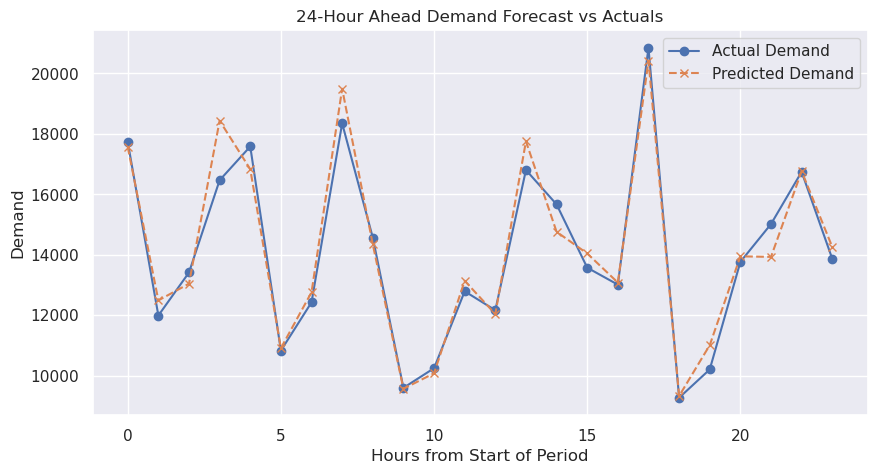

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(range(24), actual_24_hours, label='Actual Demand', marker='o')
plt.plot(range(24), predicted_24_hours.flatten(), label='Predicted Demand', linestyle='--', marker='x')
plt.title('24-Hour Ahead Demand Forecast vs Actuals')
plt.xlabel('Hours from Start of Period')
plt.ylabel('Demand')
plt.legend()
plt.show()

# Predict the demand using the predicted load for the next 24 hours

In [10]:
df =  pd.read_excel('../1_Data/datasets/2022_smd_hourly.xlsx' ,sheet_name='ISO NE CA')
df['Date'] = df.Date + pd.to_timedelta(df.Hr_End, unit='h')
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

In [11]:
df

,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point,System_Load,Reg_Service_Price,Reg_Capacity_Price,Min_5min_RSP,Max_5min_RSP,Min_5min_RCP,Max_5min_RCP
Date,,,,,,,,,,,,,,,,,,,,
2022-01-01 01:00:00,1,10845.4,10789.727,32.22,32.35,-0.12,-0.01,25.90,25.95,0.0,-0.05,44,43,10983,0.237500,11.284167,0.05,0.30,9.99,20.12
2022-01-01 02:00:00,2,10593.7,10320.195,32.12,32.31,-0.14,-0.05,25.87,25.87,0.0,0.00,44,43,10510,0.300000,11.383333,0.30,0.30,10.54,11.46
2022-01-01 03:00:00,3,10207.3,9972.371,30.76,30.85,0.00,-0.09,27.51,27.50,0.0,0.01,44,43,10161,0.112500,12.375000,0.05,0.30,11.46,12.68
2022-01-01 04:00:00,4,10026.4,9779.883,29.60,29.69,0.00,-0.09,25.14,25.13,0.0,0.01,44,43,9970,0.258333,11.763333,0.05,0.30,11.58,12.68
2022-01-01 05:00:00,5,10283.0,9777.168,30.78,30.86,0.00,-0.08,29.28,29.27,0.0,0.01,44,43,9973,0.112500,12.405000,0.05,0.30,11.58,12.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,20,12910.4,13191.898,39.01,38.97,0.00,0.04,26.36,26.27,0.0,0.09,51,50,13489,0.335000,109.751667,0.01,0.40,9.52,123.90
2022-12-31 21:00:00,21,11992.9,12575.713,38.88,38.88,0.00,0.00,25.38,25.31,0.0,0.07,51,50,12868,0.075000,21.605833,0.01,0.40,12.71,118.36
2022-12-31 22:00:00,22,11444.8,11983.841,38.68,38.73,0.00,-0.05,31.80,31.69,0.0,0.11,50,49,12264,0.230000,10.656667,0.01,0.25,10.46,12.82


In [12]:
df['System_Load'][-24:] = predicted_24_hours.flatten()

/tmp/ipykernel_12086/1189223037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['System_Load'][-24:] = predicted_24_hours.flatten()


In [13]:
features_considered = ['DA_EC', 'DA_MLC', 'DA_Demand', 'Dry_Bulb', 'RT_Demand', 'System_Load']
target_variable = 'RT_LMP'

# generate lagged features for past 24 hours
for feature in features_considered:
    for lag in range(1, 25):
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

df.dropna(inplace=True)

# scale
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df[features_considered + [f"{feat}_lag_{lag}" for feat in features_considered for lag in range(1, 25)]])
scaled_target = scaler.fit_transform(df[[target_variable]])

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state=42)

/tmp/ipykernel_12086/917895730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
/tmp/ipykernel_12086/917895730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
/tmp/ipykernel_12086/917895730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a d

In [15]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
history = model.fit(
    X_train, y_train,
    epochs=100,  
    batch_size=32,  
    validation_split=0.1,  
    callbacks=[early_stopping_monitor],  
    verbose=1  
)

Epoch 1/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0022 - mae: 0.0275 - val_loss: 0.0012 - val_mae: 0.0155
Epoch 2/100
197/197 [==============================] - 0s 1ms/step - loss: 3.8926e-04 - mae: 0.0134 - val_loss: 0.0011 - val_mae: 0.0123
Epoch 3/100
197/197 [==============================] - 0s 1ms/step - loss: 3.0858e-04 - mae: 0.0115 - val_loss: 0.0011 - val_mae: 0.0107
Epoch 4/100
197/197 [==============================] - 0s 1ms/step - loss: 2.8405e-04 - mae: 0.0111 - val_loss: 0.0011 - val_mae: 0.0115
Epoch 5/100
197/197 [==============================] - 0s 1ms/step - loss: 2.7725e-04 - mae: 0.0109 - val_loss: 0.0011 - val_mae: 0.0095
Epoch 6/100
197/197 [==============================] - 0s 1ms/step - loss: 2.3791e-04 - mae: 0.0096 - val_loss: 9.9019e-04 - val_mae: 0.0093
Epoch 7/100
197/197 [==============================] - 0s 1ms/step - loss: 2.4880e-04 - mae: 0.0100 - val_loss: 0.0011 - val_mae: 0.0114
Epoch 8/100
197/197 [====================

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_24_hours = X_test[-24:]  
y_24_hours_actual = y_test[-24:]  

# predict the demand for these 24 hours
predicted_24_hours = model.predict(X_24_hours)
predicted_24_hours = scaler.inverse_transform(predicted_24_hours)  
actual_24_hours = scaler.inverse_transform(y_24_hours_actual)  

# calculate error metrics specifically for these 24 hours
mae_24 = mean_absolute_error(actual_24_hours, predicted_24_hours)
mse_24 = mean_squared_error(actual_24_hours, predicted_24_hours)
rmse_24 = np.sqrt(mse_24)
r2_24 = r2_score(actual_24_hours, predicted_24_hours)

print(f"24-Hour Specific - MAE: {mae_24}, MSE: {mse_24}, RMSE: {rmse_24}, R-squared: {r2_24}")

1/1 [==============================] - 0s 27ms/step
24-Hour Specific - MAE: 19.105514494578046, MSE: 665.374267463198, RMSE: 25.794849630559934, R-squared: 0.6936002384538114


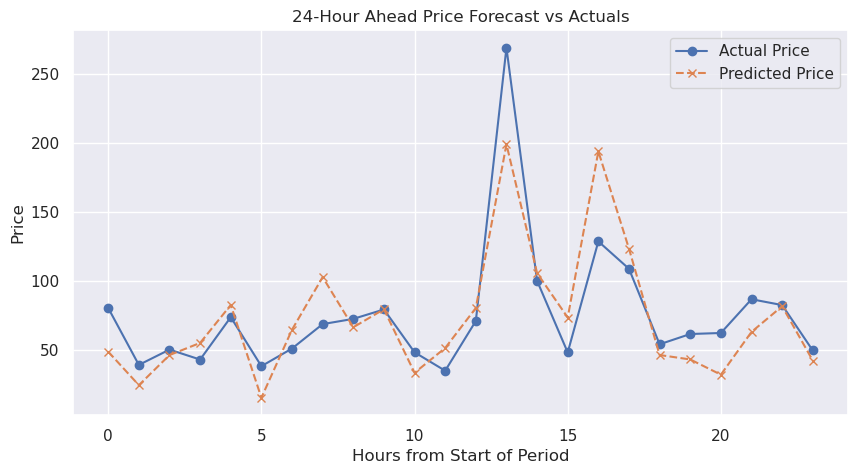

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(range(24), actual_24_hours, label='Actual Price', marker='o')
plt.plot(range(24), predicted_24_hours.flatten(), label='Predicted Price', linestyle='--', marker='x')
plt.title('24-Hour Ahead Price Forecast vs Actuals')
plt.xlabel('Hours from Start of Period')
plt.ylabel('Price')
plt.legend()
plt.show()